<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mission-1" data-toc-modified-id="Mission-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mission 1</a></span><ul class="toc-item"><li><span><a href="#Fichier-'data-projet7.csv'-(World-Income-Distribution)" data-toc-modified-id="Fichier-'data-projet7.csv'-(World-Income-Distribution)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fichier 'data-projet7.csv' (World Income Distribution)</a></span></li><li><span><a href="#GDP-per-capita-2008-($ppp)" data-toc-modified-id="GDP-per-capita-2008-($ppp)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>GDP per capita 2008 ($ppp)</a></span></li><li><span><a href="#Population-2008-(Millions)" data-toc-modified-id="Population-2008-(Millions)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Population 2008 (Millions)</a></span></li><li><span><a href="#Nomenclature-pays-FAOSTAT~ISO3" data-toc-modified-id="Nomenclature-pays-FAOSTAT~ISO3-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Nomenclature pays FAOSTAT~ISO3</a></span></li><li><span><a href="#Fichier-consolidé-World-Income-Distribution-(WID)" data-toc-modified-id="Fichier-consolidé-World-Income-Distribution-(WID)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fichier consolidé World Income Distribution (WID)</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Mission-2" data-toc-modified-id="Mission-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mission 2</a></span><ul class="toc-item"><li><span><a href="#Choix-des-pays-à-représenter" data-toc-modified-id="Choix-des-pays-à-représenter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Choix des pays à représenter</a></span></li><li><span><a href="#Distribution-des-revenus" data-toc-modified-id="Distribution-des-revenus-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution des revenus</a></span></li><li><span><a href="#Courbes-de-Lorenz" data-toc-modified-id="Courbes-de-Lorenz-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Courbes de Lorenz</a></span></li><li><span><a href="#Evolution-de-l'indice-Gini" data-toc-modified-id="Evolution-de-l'indice-Gini-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Evolution de l'indice Gini</a></span></li><li><span><a href="#Classement-par-indice-Gini" data-toc-modified-id="Classement-par-indice-Gini-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Classement par indice Gini</a></span></li></ul></li><li><span><a href="#Mission-3" data-toc-modified-id="Mission-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mission 3</a></span><ul class="toc-item"><li><span><a href="#Création-du-df-Elasticity" data-toc-modified-id="Création-du-df-Elasticity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Création du df Elasticity</a></span></li><li><span><a href="#Génération-de-l'échantillon-Gaussien" data-toc-modified-id="Génération-de-l'échantillon-Gaussien-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Génération de l'échantillon Gaussien</a></span></li><li><span><a href="#Graphiques-distributions-conditionnelles" data-toc-modified-id="Graphiques-distributions-conditionnelles-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Graphiques distributions conditionnelles</a></span></li><li><span><a href="#Création-du-dataframe-final" data-toc-modified-id="Création-du-dataframe-final-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Création du dataframe final</a></span></li></ul></li></ul></div>

In [1]:
import sample_generator_new as sg

import numpy as np                # linear algebra
import pandas as pd               # data frames

import matplotlib.pyplot as plt   # visualizations
import seaborn as sns             # visualizations
%matplotlib inline

from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# thousands separator ',' and 2 décimals
pd.options.display.float_format = '{:.2f}'.format

# Mission 1

## Fichier 'data-projet7.csv' (World Income Distribution)

In [3]:
# import data
data = pd.read_csv('data/data-projet7.csv', sep=',')
data.head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297


**Conversion de 'income' et 'gdpppp' à float**

In [4]:
# income: conversion à float
data['income'] = data['income'].str.replace(',', '.', regex=False)
data['income'] = pd.to_numeric(data['income'], errors='coerce')

# gdpppp: convertion à float
data['gdpppp'] = data['gdpppp'].str.replace(',', '.', regex=False)
data['gdpppp'] = pd.to_numeric(data['gdpppp'], errors='coerce')

In [5]:
print("Nombre de pays :", data.country.nunique())
print("Nombre d'individus :", data.country.count())
data[['income','gdpppp']].describe()

Nombre de pays : 116
Nombre d'individus : 11599


,income,gdpppp
count,11599.00,11399.00
mean,6069.22,50221.28
std,9414.19,400068.75
min,16.72,303.19
25%,900.69,2576.00
50%,2403.24,7560.00
75%,7515.42,18773.00
max,176928.55,4300332.00


**Observations** 
* s'il y a 100 quantiles par pays, il manque un quantile dans l'un des pays de notre distribution (116*100=11600)
* La variable gdp (dollars ppp) montre un Max et une standard deviation anormaux. Nous allons la remplacer par les données de la World Bank (2008)

**Années d'enquête**

In [6]:
# table year_survey
ys=data.groupby(['year_survey']).country.nunique().reset_index()
ys.set_index('year_survey',inplace=True)
ys.rename(columns={'country':'nb_ctry'},  inplace = True)
ys

,nb_ctry
year_survey,
2004,1
2006,5
2007,15
2008,76
2009,12
2010,6
2011,1


**Supression de variables et renommage**

In [7]:
#data-projet7.csv
data.drop(['year_survey','nb_quantiles','gdpppp'],axis=1,inplace=True)
data.rename(columns={'country':'ISO3','quantile':'classe_c','income':'income_c'},  inplace = True)
print("Nombre d'individus :", data.ISO3.count())
data.head(1)

Nombre d'individus : 11599


,ISO3,classe_c,income_c
0,ALB,1,728.90


## GDP per capita 2008 ($ppp)
https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

In [8]:
# import data
gdp = pd.read_excel('data/gdp_pc_ppp.xlsx', usecols=['Country Code','gdp_pc'])
gdp.rename(columns={'Country Code':'ISO3'},  inplace = True)
print("Nombre d'individus :", gdp.ISO3.count())
gdp.head(1)

Nombre d'individus : 240


,ISO3,gdp_pc
0,ABW,38515.26


## Population 2008 (Millions)
https://data.worldbank.org/indicator/sp.pop.totl

In [9]:
# import de la population mondiale 2008 de la FAO
population = pd.read_csv('data/popfao_2008.csv', usecols=['Code zone','Valeur'])
population.rename(columns={'Code zone':'FAOSTAT','Valeur':'population'},  inplace = True)
# conversion de 'population' en millions
population['population']=population['population']/1000

print("Nombre d'individus :",population.FAOSTAT.count())
population.head(1)

Nombre d'individus : 231


,FAOSTAT,population
0,2,27.29


## Nomenclature pays FAOSTAT~ISO3

In [10]:
# import de la nomenclature pays (FAO)
key = pd.read_excel('data/ctry_keys.xls')
key.columns=['ISO3','country','FAOSTAT']
print("Nombre d'individus :",key.FAOSTAT.count())
key.head(1)

Nombre d'individus : 197


,ISO3,country,FAOSTAT
0,ARM,Armenia,1


**Merge des tables pays, nomenclature et population**

In [11]:
# left join ctry_list, key
lj = pd.merge(data, key, how = 'left', on='ISO3')
lj.head()

,ISO3,classe_c,income_c,country,FAOSTAT
0,ALB,1,728.90,Albania,3.00
1,ALB,2,916.66,Albania,3.00
2,ALB,3,1010.92,Albania,3.00
3,ALB,4,1086.91,Albania,3.00
4,ALB,5,1132.70,Albania,3.00


In [12]:
# left join lj, population
pop = pd.merge(lj, population, how = 'left', on='FAOSTAT')
del pop['FAOSTAT']
print("Nombre d'individus :",pop.ISO3.count())
pop.head(2)

Nombre d'individus : 11599


,ISO3,classe_c,income_c,country,population
0,ALB,1,728.90,Albania,2.99
1,ALB,2,916.66,Albania,2.99


## Fichier consolidé World Income Distribution (WID)

**Merge et nettoyage**

In [13]:
# left join cons, gdp
consolidation = pd.merge(pop, gdp, how = 'left', on='ISO3')
consolidation.head(1)

,ISO3,classe_c,income_c,country,population,gdp_pc
0,ALB,1,728.90,Albania,2.99,8228.37


In [14]:
# check NaN
na = consolidation[consolidation.isnull().any(axis=1)]
na.head(2)

,ISO3,classe_c,income_c,country,population,gdp_pc
5800,XKX,1,437.89,NaN,nan,7236.41
5801,XKX,2,508.17,NaN,nan,7236.41


In [15]:
# drop NaN
consolidation.dropna(inplace=True)
#consolidation=consolidation[['ISO3','country','population', 'classe_c', 'income_c','gdp_pc']]
consolidation.head(1)

,ISO3,classe_c,income_c,country,population,gdp_pc
0,ALB,1,728.90,Albania,2.99,8228.37


In [16]:
# classe 41 manquante pour LTU Lithuania -> 99 quantiles seulement
ltu=consolidation[consolidation['ISO3'].isin(['LTU'])]
ltu.classe_c.nunique()

# Supression de Lithuanie
consolidation[consolidation['ISO3']!='LTU'].head(1)

,ISO3,classe_c,income_c,country,population,gdp_pc
0,ALB,1,728.90,Albania,2.99,8228.37


## Conclusions

**Etendue de l'étude**
* En 2008, la [population mondiale](https://www.prb.org/2008wpds/) est de 6.7 milliards

In [17]:
x=consolidation.groupby(['ISO3']).population.mean().reset_index()

# total population de l'étude
x=consolidation['population'].sum()/100000
print("Population de l'étude :",round(x,2),' milliards')

# pourcentage de population mondiale de l'étude
y=round((x/6.7)*100,1)
print("Pourcentage de la population mondiale (2008) de l'étude : ",round(y,1),' %')

Population de l'étude : 6.15  milliards
Pourcentage de la population mondiale (2008) de l'étude :  91.8  %


**Info variables**

In [18]:
# check nb de quantiles unique
print("Nombre de quantiles uniques : ",consolidation['classe_c'].nunique())
# nombre de pays
print("Nombre de pays uniques : ",consolidation['ISO3'].nunique())

Nombre de quantiles uniques :  100
Nombre de pays uniques :  111


**Data describe**

In [19]:
consolidation.describe()

,classe_c,income_c,population,gdp_pc
count,11099.00,11099.00,11099.00,11099.00
mean,50.50,6148.37,55.42,15788.47
std,28.87,9466.70,172.37,15220.17
min,1.00,16.72,0.31,615.07
25%,25.50,922.41,4.77,3914.61
50%,51.00,2495.71,14.01,10236.54
75%,75.50,7622.36,43.27,20837.25
max,100.00,176928.55,1344.42,86693.90


**Pandas Profiling Report**

**Observations**

* Les quantiles sont au nombre de 100, ce sont donc des centiles ou percentiles
* Leur avantage est de contrebalancer les limites de la moyenne (mean) qui masque les disparités de distribution par classe de revenus
* Purchasing Power Parity (PPP) est une unité calculée par la Banque Mondiale, selon la méthode EKS (Eltöte-Köves-Szulc). Elle sert à établir une comparaison entre pays du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.
* La méthode EKS est une méthode multilatérale qui calcule la nième racine du produit de tous les [indices de Fisher](https://fr.wikipedia.org/wiki/Indice_des_prix_de_Laspeyres-Paasche) possibles entre n pays. Le principal concurrent de la méthode EKS est la méthode Geary-Khami

In [20]:
# export du df nettoyé
consolidation.to_csv('data/wid_p7.csv')
# export du df nettoyé
consolidation.to_excel('data/wid_p7.xlsx')

# Mission 2

* Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
* Représentez la courbe de Lorenz de chacun des pays choisis.
* Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
* Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

## Choix des pays à représenter 
**Critères**
* Sélection de pays avec 10 années de données en terme d'indice Gini
* Tableau World Bank Analytical Classifications (année 2008)
* Sélection de 6-8 pays (si possible) dans les quatre categories de revenu
* La France doit être dans le panel

In [21]:
# tableau World Bank Analytical Classifications
i = pd.read_excel('data/income_level_2008.xls')
i.set_index('ISO3',inplace=True)

# pays retenus
s=i.loc[['ARG','CZE','ECU','FRA','IDN','IND','RUS']]
s

,country,inc_id,income
ISO3,,,
ARG,Argentina,UM,Upper middle income
CZE,Czech Republic,H,High income
ECU,Ecuador,LM,Lower middle income
FRA,France,H,High income
IDN,Indonesia,LM,Lower middle income
IND,India,LM,Lower middle income
RUS,Russian Federation,UM,Upper middle income


* Seul pays 'Low Income' avec 10 années de données = Kyrgyz Republic (pas assez significatif)

## Distribution des revenus

In [22]:
# data import
tp = pd.read_csv('data/wid_p7.csv', usecols=['ISO3','country','classe_c','income_c'])
tp.head(2)

,ISO3,classe_c,income_c,country
0,ALB,1,728.90,Albania
1,ALB,2,916.66,Albania


In [23]:
gr=tp[tp['ISO3'].isin(['ARG','CZE','ECU','FRA','IDN','IND','RUS'])]
gr.ISO3.unique()

array(['ARG', 'CZE', 'ECU', 'FRA', 'IDN', 'IND', 'RUS'], dtype=object)

In [24]:
gr.head(2)

,ISO3,classe_c,income_c,country
100,ARG,1,254.09,Argentina
101,ARG,2,470.50,Argentina


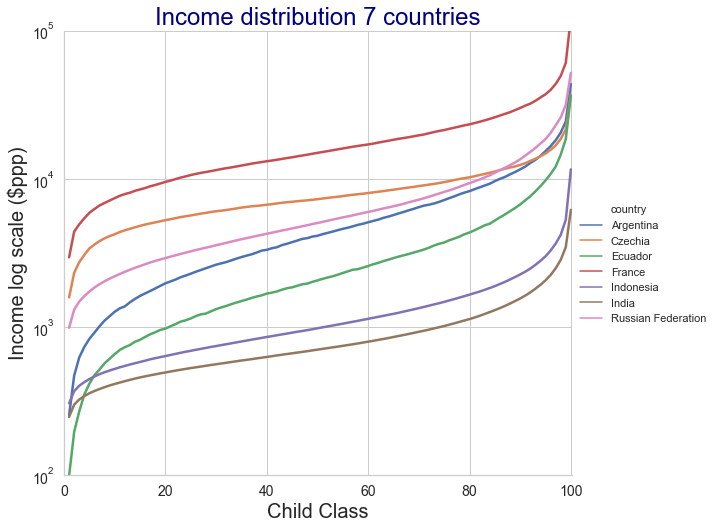

In [25]:
# affichage du graphique
sns.set(font_scale=1) 

sns.set_style("whitegrid")

ax=sns.relplot(x="classe_c", y="income_c", hue="country", kind="line", data=gr, height=7, aspect=1.2, linewidth=2.5)
ax.set(yscale="log")


# titre
plt.title("Income distribution 7 countries", fontsize=24, color = 'navy')

plt.xlim(0,100.2)
plt.ylim(10**2,10**5)

# Libellé Abscisse (x)
plt.xticks(size=14)
plt.xlabel("Child Class", size=20)

# Libellé Ordonnée (y)
plt.yticks(size=14)
plt.ylabel("Income log scale ($ppp)", size=20, rotation=90)

plt.savefig('img/2.2 dist_revenus.png', dpi=120, bbox_inches='tight')

## Courbes de Lorenz

**Data**

In [26]:
# Création de 8 df (un par pays)
ARG=gr[gr['ISO3']=='ARG']
CZE=gr[gr['ISO3']=='CZE']
ECU=gr[gr['ISO3']=='ECU']
FRA=gr[gr['ISO3']=='FRA']
IDN=gr[gr['ISO3']=='IDN']
IND=gr[gr['ISO3']=='IND']
RUS=gr[gr['ISO3']=='RUS']

In [27]:
# création des 8 datasets
l1=ARG.income_c.values
l2=CZE.income_c.values
l3=ECU.income_c.values
l4=FRA.income_c.values
l5=IDN.income_c.values
l6=IND.income_c.values
l7=RUS.income_c.values

In [28]:
# calcul des courbes 
lor1 = np.cumsum(np.sort(l1)) / l1.sum()
lor1 = np.append([0],lor1) # La courbe de Lorenz commence à 0

lor2 = np.cumsum(np.sort(l2)) / l2.sum()
lor2 = np.append([0],lor2) 

lor3 = np.cumsum(np.sort(l3)) / l3.sum()
lor3 = np.append([0],lor3) 

lor4 = np.cumsum(np.sort(l4)) / l4.sum()
lor4 = np.append([0],lor4) 

lor5 = np.cumsum(np.sort(l5)) / l5.sum()
lor5 = np.append([0],lor5) 

lor6 = np.cumsum(np.sort(l6)) / l6.sum()
lor6 = np.append([0],lor6) 

lor7 = np.cumsum(np.sort(l7)) / l7.sum()
lor7 = np.append([0],lor7) 

**Graphique**

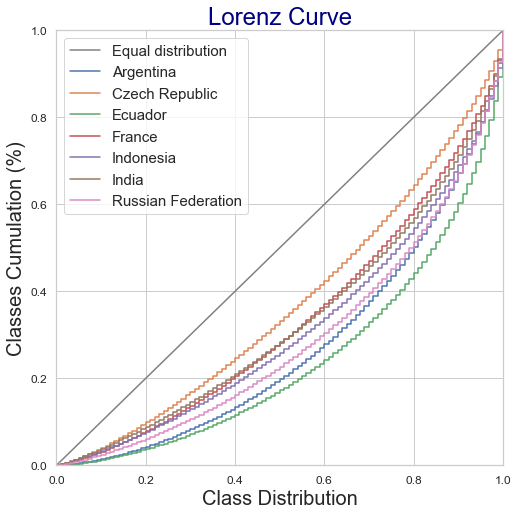

In [29]:
# affichage du graphique
sns.set(font_scale=1) 
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=[8,8])
plt.xlim(0)
plt.ylim(0)

# titre
plt.title("Lorenz Curve", fontsize=24, color = 'navy')

# Libellé Abscisse (x)
plt.xticks(size=12)
plt.xlabel("Class Distribution", size=20)

# Libellé Ordonnée (y)
plt.yticks(size=12)
plt.ylabel("Classes Cumulation (%)", size=20, rotation=90)

# ligne d'égalité
ax.plot([0,1], [0,1], color='grey')

# courbes de Lorenz
plt.plot(np.linspace(0,1,len(lor1)),lor1,drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lor2)),lor2,drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lor3)),lor3,drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lor4)),lor4,drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lor5)),lor5,drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lor6)),lor6,drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lor7)),lor7,drawstyle='steps-post')

# légendes
mylabels = ['Equal distribution','Argentina','Czech Republic','Ecuador','France','Indonesia','India','Russian Federation']
plt.legend(labels = mylabels, fontsize=15)

plt.savefig('img/2.3 lorenz.png', dpi=120, bbox_inches='tight')

## Evolution de l'indice Gini

**Data**

In [30]:
# récupération de notre sélection de pays dans le fichier 'gini_histo_ok'
g = pd.read_excel('data/gini_histo_ok.xls')
gin=g[g['ISO3'].isin(['ARG','CZE','ECU','FRA','IDN','RUS'])]
gin

,ISO3,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,ARG,Argentina,48.30,47.70,46.60,46.30,44.50,43.90,43.00,42.30,41.20,41.00
24,CZE,Czech Republic,27.50,26.90,26.70,26.00,26.30,26.20,26.60,26.40,26.10,26.50
28,ECU,Ecuador,53.90,53.10,52.20,53.30,49.70,48.40,48.70,45.90,46.10,46.90
34,FRA,France,30.60,29.80,29.70,32.40,33.00,32.70,33.70,33.30,33.10,32.50
44,IDN,Indonesia,32.70,33.00,34.20,35.70,35.10,35.10,36.40,39.70,39.60,39.90
90,RUS,Russian Federation,40.30,41.30,41.00,42.30,41.60,39.80,39.50,39.70,40.70,40.90


* India a été retiré de la liste dû aux années manquantes

In [31]:
# melt : pivot des variables numériques dans les colonnes 'year' et 'value'
gini_hist=gin.melt(id_vars=['ISO3','country'], var_name='year')
gini_hist.head(2)

,ISO3,country,year,value
0,ARG,Argentina,2004,48.30
1,CZE,Czech Republic,2004,27.50


**Graphique**

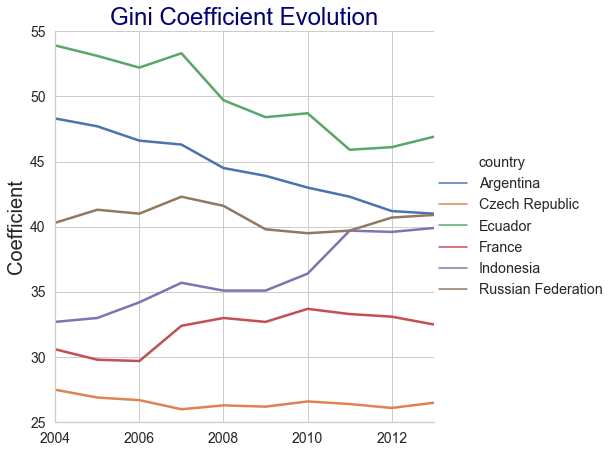

In [32]:
# historique
sns.set(font_scale=1.3) 
sns.set_style("whitegrid")
sns.relplot(x="year", y="value", kind="line", hue="country", data=gini_hist,height=6.5, aspect=1, linewidth=2.5)

# titre
plt.title("Gini Coefficient Evolution", fontsize=24, color = 'navy')
plt.xlim(2004, 2013)
plt.ylim(25, 55)

# Libellé Abscisse (x)
plt.xticks(size=14)
plt.xlabel("")

# Libellé Ordonnée (y)
plt.yticks(size=14)
plt.ylabel("Coefficient", size=20, rotation=90)

plt.savefig('img/2.4 evo_gini.png', dpi=120, bbox_inches='tight')

**Analyse**

* 2 pays flat : Russian Federation, Czech Republic
* 2 pays tendent vers une meilleure répartition : Equador, Argentina
* 3 courbes convergent à 40% en 2013 : Argentina, Russian Federation, Indonesia
* Czech Républic est le pays le plus égalitaire et le plus stable sur la période 2004-20013
* La France est le second pays le plus égalitaire de la liste

## Classement par indice Gini

**Data**

In [33]:
# import fichier
hist = pd.read_excel('data/gini_histo_ok.xls')
# ajout d'une colonne 'mean'
hist['mean']=hist.mean(axis = 1)
hist.head(2)

,ISO3,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,mean
0,ALB,Albania,nan,30.60,nan,nan,30.00,nan,nan,nan,29.00,nan,29.87
1,ARG,Argentina,48.30,47.70,46.60,46.30,44.50,43.90,43.00,42.30,41.20,41.00,44.48


In [34]:
# on remplace les NaN de l'année 2008 par la moyenne des 10 années
gini=hist[['ISO3','country',2008,'mean']].copy()
gini[2008].fillna(gini['mean'], inplace=True)
gini.drop(['mean'], axis=1, inplace=True)
gini.columns=['ISO3','country', 'gini']
gini.head(2)

,ISO3,country,gini
0,ALB,Albania,30.00
1,ARG,Argentina,44.50


**Top 5 égalitaires**

In [35]:
# tri décroissant
gini.sort_values(by = ['gini'], ascending = True, inplace=True)
gi=gini.reset_index(drop=True)
# les 5 pays à l'indice Gini le plus faible (plus égalitaire)
gi.head(5)

,ISO3,country,gini
0,SVN,Slovenia,23.70
1,DNK,Denmark,25.20
2,SVK,Slovak Republic,26.00
3,CZE,Czech Republic,26.30
4,AZE,Azerbaijan,26.60


* Les 5 pays ayant le plus faible indice Gini en 2008 sont : Azerbaijan, Czech Republic, Slovak Republic, Denmark, Slovenia

**Top 5 inégalitaires**

In [36]:
# les 5 pays à l'indice Gini le plus fort (plus inégalitaire)
gi.tail(5)

,ISO3,country,gini
106,GTM,Guatemala,54.60
107,HND,Honduras,55.50
108,COL,Colombia,55.50
109,CAF,Central African Republic,56.20
110,ZAF,South Africa,63.00


* Les 5 pays ayant le plus fort indice Gini en 2008 sont : Guatemala, Honduras, Colombia, Central African Republic, South Africa

**France**

In [37]:
# La France
fr = gi[gi['ISO3'].str.contains('FRA')]
fr

,ISO3,country,gini
37,FRA,France,33.00


* La France est le 38e pays de la liste en terme d'égalité (2008)

# Mission 3

## Création du df Elasticity

**Dafaframe elasticity**

In [38]:
# import df elasticity régional
elas = pd.read_excel('data/elasticity.xls', index_col=0)
elas

,Base case,Optimistic (high mobility),Pessimistic (low mobility)
Nordic European countries and Canada,0.20,0.15,0.30
Europe (except nordic countries),0.40,0.30,0.50
Australia/New Zealand/USA,0.40,0.30,0.50
Asia,0.50,0.40,0.60
Latin America/Africa,0.66,0.50,0.90


In [39]:
# import IGEincome
i = pd.read_csv('data/GDIMMay2018.csv', usecols=['iso3','IGEincome'])
i.rename(columns={'iso3':'ISO3','IGEincome': 'pj'}, inplace=True)
Pj = i.groupby('ISO3').mean()
print(Pj.count())
Pj.head(2)

pj    75
dtype: int64


,pj
ISO3,
AFG,nan
AGO,nan


In [40]:
# import liste pays de l'étude
c=pd.read_csv('data/wid_p7.csv', usecols=['ISO3'])
l=pd.DataFrame(c.ISO3.unique())
l.columns=['ISO3']
l.count()

ISO3    111
dtype: int64

In [41]:
# left join pays de l'étude
le = pd.merge(l, Pj, how = 'left', on='ISO3')
print(le.count())
le.head(1)

ISO3    111
pj       65
dtype: int64


,ISO3,pj
0,ALB,0.82


In [42]:
# check NaN
na = le[le.isnull().any(axis=1)]
print(na.count())
na.head(1)

ISO3    46
pj       0
dtype: int64


,ISO3,pj
1,ARG,nan


In [43]:
# import données manquantes = valeur régionale du fichier 'elasticity'
missing_val=pd.read_excel('data/pj_na.xls', usecols=['ISO3','pj'])
print(missing_val.count())
missing_val.head(1)

ISO3    47
pj      47
dtype: int64


,ISO3,pj
0,ARG,0.40


In [44]:
# on remplace NaN par la valeur régionale du fichier 'elasticity'df[df.name != 'Tina']
elasticity=le.set_index("ISO3").pj.fillna(missing_val.set_index("ISO3").pj).reset_index()
elasticity.sort_values(by=['ISO3'])
elasticity.count()

ISO3    111
pj      111
dtype: int64

## Génération de l'échantillon Gaussien

In [45]:
# df Elasticity
elasticity.head(2)

,ISO3,pj
0,ALB,0.82
1,ARG,0.40


**Computation**

In [46]:
# querry génération de l'échantillon
Q3 = pd.DataFrame()

for i in range(len(elasticity)):
    
    nb_quantiles = 100
    n = 1000*nb_quantiles
    pj = elasticity.loc[i]['pj']
    
    y_child, y_parents = sg.generate_incomes(n, pj)
    e = elasticity.loc[i]['ISO3']

    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)

    cq = sg.compute_quantiles(y_child, y_parents, nb_quantiles)
    cq['ISO3'] = e
    Q3 = Q3.append(cq, ignore_index = True)

In [47]:
# sortie
Q3.sort_values(by=['ISO3', 'c_i_child', 'c_i_parent'],inplace=True)
print("Nombre d'individus :", Q3.ISO3.count())
Q3.head(2)

Nombre d'individus : 11100000


,y_child,y_parents,c_i_child,c_i_parent,ISO3
698,0.04,0.05,1,1,ALB
1133,0.01,0.08,1,1,ALB


**Nettoyage**

In [48]:
df=Q3.groupby(['ISO3','c_i_child','c_i_parent']).c_i_parent.count()
df_final=pd.DataFrame(df)
df_final.columns=['count']
df_final.reset_index(inplace=True) 
df_final.head(2)

,ISO3,c_i_child,c_i_parent,count
0,ALB,1,1,208
1,ALB,1,2,107


In [49]:
df_final['count'].sum()

11100000

In [50]:
df_final.count()

ISO3          1081214
c_i_child     1081214
c_i_parent    1081214
count         1081214
dtype: int64

In [51]:
# transformation de count en %
df_final['percent']=df_final['count']/100000*100
df_final.drop(['count'], axis=1, inplace=True)
df_final.head(2)

,ISO3,c_i_child,c_i_parent,percent
0,ALB,1,1,0.21
1,ALB,1,2,0.11


## Graphiques distributions conditionnelles

In [52]:
# Recherche des valeurs d'elasticity significatives de notre échantillon : Min, Max, quartiles
elasticity.describe()

,pj
count,111.00
mean,0.53
std,0.20
min,0.11
25%,0.40
50%,0.50
75%,0.66
max,1.10


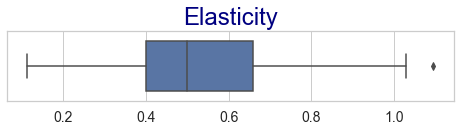

In [53]:
# 'length'
sns.set(font_scale=1) 
sns.set_style("whitegrid")
plt.figure(figsize=(8,1.3))

g=sns.boxplot(data=elasticity[['pj']],width =0.7,orient="h")
g.set(yticklabels=[])
plt.xticks(size=14)

plt.title("Elasticity", fontsize=24, color = 'navy')
plt.savefig('img/3.elas.boxplot.png', dpi=120, bbox_inches='tight')

In [54]:
liste_E=[0.11,0.40,0.50,0.66,1.10]

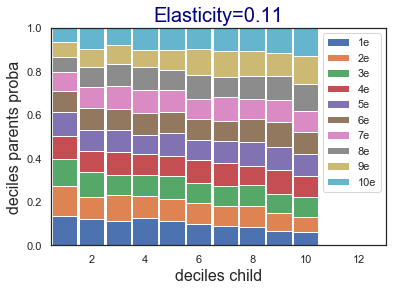

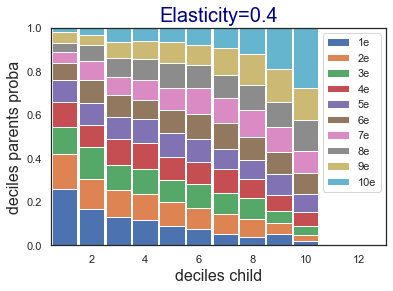

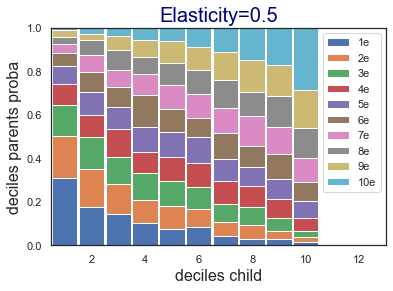

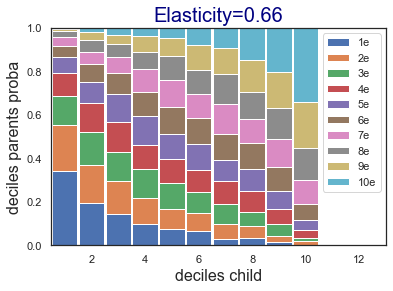

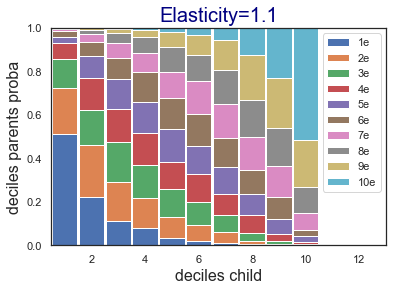

In [55]:
# choix des paramètres
nb_quantiles = 10       # nombre de classes de revenu
n = 1000*nb_quantiles   # taille de l'échantillon

for pj in liste_E:
    sns.set(font_scale=1) 
    sns.set_style("white")
    y_child, y_parents = sg.generate_incomes(n, pj)
    sample = sg.compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = sg.conditional_distributions(sample, nb_quantiles)
    sg.plot_conditional_distributions(pj, cd.T, nb_quantiles) # transpose cd

## Création du dataframe final

**Nouvel échantillon, clonage**

In [56]:
x = round(df_final['percent']*500,0) 

#clonage du dataset
classes = pd.DataFrame(np.repeat(df_final.values,x,axis=0))
classes.columns = ['ISO3','c_i_child','c_i_parent','percent']
classes.drop(['percent'], axis=1, inplace=True)
classes[['c_i_child','c_i_parent']] = classes[['c_i_child','c_i_parent']].astype(int)
classes.columns=['ISO3','classe_c','classe_p']

print("Nombre d'individus",classes.ISO3.count())
print("Nombre de pays :",classes.ISO3.nunique())
classes.head(1)

Nombre d'individus 5555338
Nombre de pays : 111


,ISO3,classe_c,classe_p
0,ALB,1,1


**Tables**

In [57]:
# fichier wid
wid=pd.read_csv('data/wid_p7.csv', index_col=0)
wid.drop(['population'],axis=1,inplace=True)
print("Nombre d'observations",wid.ISO3.count())
wid.head(2)

Nombre d'observations 11099


,ISO3,classe_c,income_c,country,gdp_pc
0,ALB,1,728.90,Albania,8228.37
1,ALB,2,916.66,Albania,8228.37


In [58]:
# indice Gini
g=gini.copy()
g.drop(['country'],axis=1,inplace=True)
g.columns = ['ISO3','gini']
print("Nombre d'individus",g.ISO3.count())
g.head(1)

Nombre d'individus 111


,ISO3,gini
94,SVN,23.70


**Merge**

In [59]:
# merge wid~gini
table=pd.merge(wid, g, on='ISO3', how='outer')
table.head(2)

,ISO3,classe_c,income_c,country,gdp_pc,gini
0,ALB,1.00,728.90,Albania,8228.37,30.00
1,ALB,2.00,916.66,Albania,8228.37,30.00


In [60]:
# merge table~classes
df=pd.merge(classes, table, on=['ISO3','classe_c'], how='left')
print("Nombre d'observations",df.ISO3.count())
df.head(2)

Nombre d'observations 5555338


,ISO3,classe_c,classe_p,income_c,country,gdp_pc,gini
0,ALB,1,1,728.90,Albania,8228.37,30.00
1,ALB,1,1,728.90,Albania,8228.37,30.00


**Revenus parents**

In [61]:
# création des revenus parents
rp=df[['ISO3','classe_c','income_c']].copy()
x=rp.groupby(['ISO3','classe_c']).income_c.mean().reset_index()
x.rename(columns={'classe_c':'classe_p','income_c':'income_p'},  inplace = True)
print("Nombre d'individus",x.ISO3.count())
x.head(2)

Nombre d'individus 11100


,ISO3,classe_p,income_p
0,ALB,1,728.90
1,ALB,2,916.66


In [62]:
#ajout des revenus parents
f=pd.merge(df,x, on=['ISO3','classe_p'], how='left' )
f=f[['ISO3','country','classe_c','income_c','classe_p','income_p','gdp_pc','gini']]
final=f[f.ISO3 != 'LTU']
print("Nombre d'individus",final.ISO3.count())
final.head(1)

Nombre d'individus 5505245


,ISO3,country,classe_c,income_c,classe_p,income_p,gdp_pc,gini
0,ALB,Albania,1,728.90,1,728.90,8228.37,30.00


**NaN**

In [63]:
na = final[final.isnull().any(axis=1)]
print('Indice gini manquant pour les pays suivants :',na.country.unique())

Indice gini manquant pour les pays suivants : ['Cambodia']


In [64]:
final=final.dropna()
print("Nombre d'observations :",final.ISO3.count())
print("Nombre de pays :",final.ISO3.nunique())

Nombre d'observations : 5455255
Nombre de pays : 109


**Export fichier final**

In [65]:
final.to_csv('data/final.csv')

In [66]:
final.head(1)

,ISO3,country,classe_c,income_c,classe_p,income_p,gdp_pc,gini
0,ALB,Albania,1,728.90,1,728.90,8228.37,30.00
